In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn import tree

In [ ]:
df1= pd.read_csv("/content/flights.csv",error_bad_lines=False)
df1

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448.0,404.0,4.0,430.0,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330.0,737.0,4.0,750.0,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296.0,800.0,11.0,806.0,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342.0,748.0,8.0,805.0,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448.0,254.0,5.0,320.0,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3100530,2015,7,13,1,WN,3329,N8600F,PHL,DEN,1840,1839.0,-1.0,24.0,1903.0,270.0,245.0,216.0,1558.0,2039.0,5.0,2110.0,2044.0,-26.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3100531,2015,7,13,1,WN,4495,N659SW,LAS,SLC,1840,1901.0,21.0,14.0,1915.0,75.0,71.0,51.0,368.0,2106.0,6.0,2055.0,2112.0,17.0,0.0,0.0,NaN,0.0,0.0,0.0,17.0,0.0
3100532,2015,7,13,1,EV,2698,N830AS,DFW,BTR,1840,1836.0,-4.0,18.0,1854.0,86.0,79.0,58.0,383.0,1952.0,3.0,2006.0,1955.0,-11.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3100533,2015,7,13,1,EV,4119,N14562,DAY,EWR,1840,1829.0,-11.0,20.0,1849.0,105.0,115.0,87.0,533.0,2016.0,8.0,2025.0,2024.0,-1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100535 entries, 0 to 3100534
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             float64
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    float64
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             float64
 24

In [ ]:
df1.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,3100535.0,3.100535e+06,3.100535e+06,3.100535e+06,3.100535e+06,3.100535e+06,3.038059e+06,3.038058e+06,3.036298e+06,3.036298e+06,3.100528e+06,3.027043e+06,3.027043e+06,3.100534e+06,3.034163e+06,3.034163e+06,3.100534e+06,3.034163e+06,3.027043e+06,3.100534e+06,3.100534e+06,617019.000000,617019.000000,617019.000000,617019.000000,617019.000000
mean,2015.0,3.795280e+00,1.501551e+01,3.942569e+00,2.200325e+03,1.329466e+03,1.336839e+03,1.042647e+01,1.613150e+01,1.358974e+03,1.412503e+02,1.371726e+02,1.136429e+02,8.183322e+02,1.473070e+03,7.410827e+00,1.496249e+03,1.477978e+03,6.005662e+00,2.812419e-03,2.089027e-02,13.595293,0.059520,18.637796,23.688880,3.137044
std,0.0,1.860522e+00,8.748641e+00,1.991065e+00,1.774745e+03,4.822293e+02,4.956795e+02,3.826525e+01,9.220571e+00,4.971450e+02,7.495919e+01,7.414076e+01,7.213271e+01,6.037512e+02,5.222455e+02,5.725255e+00,5.047531e+02,5.264202e+02,4.053638e+01,5.295762e-02,1.430170e-01,27.767202,1.817142,47.059613,43.048561,21.203320
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-6.800000e+01,1.000000e+00,1.000000e+00,1.800000e+01,1.500000e+01,7.000000e+00,2.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,2.000000e+00,7.000000e+00,2.000000e+00,7.360000e+02,9.190000e+02,9.230000e+02,-5.000000e+00,1.100000e+01,9.370000e+02,8.500000e+01,8.300000e+01,6.100000e+01,3.720000e+02,1.056000e+03,4.000000e+00,1.111000e+03,1.100000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,4.000000e+00,1.500000e+01,4.000000e+00,1.683000e+03,1.325000e+03,1.331000e+03,-1.000000e+00,1.400000e+01,1.344000e+03,1.220000e+02,1.190000e+02,9.500000e+01,6.470000e+02,1.509000e+03,6.000000e+00,1.520000e+03,1.513000e+03,-4.000000e+00,0.000000e+00,0.000000e+00,2.000000,0.000000,2.000000,4.000000,0.000000
75%,2015.0,5.000000e+00,2.300000e+01,6.000000e+00,3.373000e+03,1.730000e+03,1.740000e+03,9.000000e+00,1.900000e+01,1.754000e+03,1.730000e+02,1.690000e+02,1.440000e+02,1.056000e+03,1.913000e+03,9.000000e+00,1.919000e+03,1.918000e+03,1.000000e+01,0.000000e+00,0.000000e+00,18.000000,0.000000,19.000000,30.000000,0.000000
max,2015.0,7.000000e+00,3.100000e+01,7.000000e+00,9.794000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,7.180000e+02,7.660000e+02,6.900000e+02,4.983000e+03,2.400000e+03,2.020000e+02,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1101.000000,241.000000,1971.000000,1331.000000,1152.000000


In [ ]:
df=df1.head(100000)
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448.0,404.0,4.0,430.0,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330.0,737.0,4.0,750.0,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296.0,800.0,11.0,806.0,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342.0,748.0,8.0,805.0,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448.0,254.0,5.0,320.0,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2015,1,7,3,EV,4992,N837AS,ATL,BQK,1108,1102.0,-6.0,23.0,1125.0,71.0,66.0,40.0,238.0,1205.0,3.0,1219.0,1208.0,-11.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
99996,2015,1,7,3,NK,394,N522NK,LAS,PHL,1108,1117.0,9.0,11.0,1128.0,274.0,267.0,248.0,2176.0,1836.0,8.0,1842.0,1844.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
99997,2015,1,7,3,OO,5606,N582SW,SFO,BFL,1108,1101.0,-7.0,28.0,1129.0,77.0,91.0,59.0,238.0,1228.0,4.0,1225.0,1232.0,7.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
99998,2015,1,7,3,UA,1135,N38473,ORD,MCO,1109,1116.0,7.0,26.0,1142.0,165.0,157.0,123.0,1005.0,1445.0,8.0,1454.0,1453.0,-1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


THE NUMBER OF FLIGHTS WHICH GOT DIVERTED

In [ ]:
df['DIVERTED'].value_counts()

0.0    99776
1.0      224
Name: DIVERTED, dtype: int64

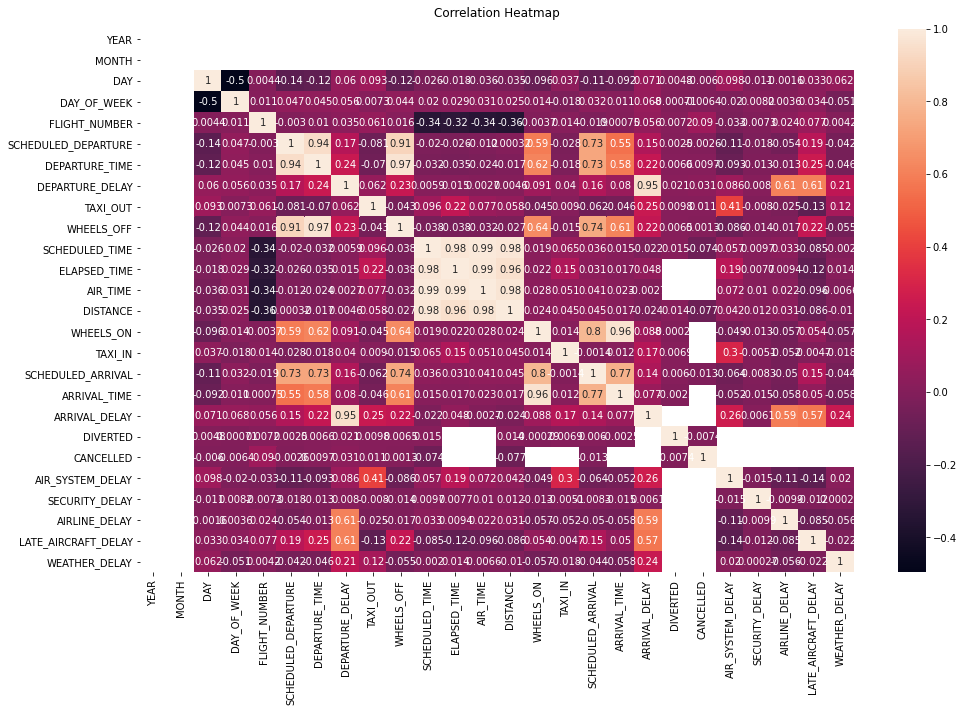

In [ ]:
plt.figure(figsize=(16, 10))
hm=sns.heatmap(df.corr(),annot=True);
hm.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
df.drop(['YEAR','DAY_OF_WEEK','FLIGHT_NUMBER','AIRLINE','TAIL_NUMBER','TAXI_OUT','SCHEDULED_TIME','DEPARTURE_TIME','DISTANCE',
         'WHEELS_ON','TAXI_IN','WHEELS_OFF','SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','ARRIVAL_TIME','CANCELLATION_REASON'],
        axis=1,inplace=True)
df

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,ANC,SEA,5,-11.0,430.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1,1,LAX,PBI,10,-8.0,750.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,1,1,SFO,CLT,20,-2.0,806.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1,1,LAX,MIA,20,-5.0,805.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,1,1,SEA,ANC,25,-1.0,320.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,7,ATL,BQK,1108,-6.0,1219.0,-11.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
99996,1,7,LAS,PHL,1108,9.0,1842.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
99997,1,7,SFO,BFL,1108,-7.0,1225.0,7.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
99998,1,7,ORD,MCO,1109,7.0,1454.0,-1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


FINDING AND REPLACING NAN VALUES WITH MEAN

In [ ]:
df.isna().sum()

MONTH                      0
DAY                        0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_DELAY         2298
SCHEDULED_ARRIVAL          0
ARRIVAL_DELAY           2613
DIVERTED                   0
CANCELLED                  0
AIR_SYSTEM_DELAY       65375
SECURITY_DELAY         65375
AIRLINE_DELAY          65375
LATE_AIRCRAFT_DELAY    65375
WEATHER_DELAY          65375
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer 
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(df.iloc[:,4:])
df.iloc[:,4:]=imputer.transform(df.iloc[:,4:])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
df.head(10)

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,ANC,SEA,5.0,-11.0,430.0,-22.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971
1,1,1,LAX,PBI,10.0,-8.0,750.0,-9.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971
2,1,1,SFO,CLT,20.0,-2.0,806.0,5.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971
3,1,1,LAX,MIA,20.0,-5.0,805.0,-9.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971
4,1,1,SEA,ANC,25.0,-1.0,320.0,-21.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971
5,1,1,SFO,MSP,25.0,-5.0,602.0,8.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971
6,1,1,LAS,MSP,25.0,-6.0,526.0,-17.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971
7,1,1,LAX,CLT,30.0,14.0,803.0,-10.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971
8,1,1,SFO,DFW,30.0,-11.0,545.0,-13.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971
9,1,1,LAS,ATL,30.0,3.0,711.0,-15.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971


Creating a dependent result variable

In [ ]:
df['RESULT']=df.apply(lambda df : 1 if df['ARRIVAL_DELAY']>15 else 0,axis=1)
df.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,RESULT
0,1,1,ANC,SEA,5.0,-11.0,430.0,-22.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
1,1,1,LAX,PBI,10.0,-8.0,750.0,-9.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
2,1,1,SFO,CLT,20.0,-2.0,806.0,5.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
3,1,1,LAX,MIA,20.0,-5.0,805.0,-9.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
4,1,1,SEA,ANC,25.0,-1.0,320.0,-21.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
5,1,1,SFO,MSP,25.0,-5.0,602.0,8.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
6,1,1,LAS,MSP,25.0,-6.0,526.0,-17.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
7,1,1,LAX,CLT,30.0,14.0,803.0,-10.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
8,1,1,SFO,DFW,30.0,-11.0,545.0,-13.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
9,1,1,LAS,ATL,30.0,3.0,711.0,-15.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0


In [ ]:
df['RESULT'].value_counts()

0    63779
1    36221
Name: RESULT, dtype: int64

In [ ]:
df.drop(['ORIGIN_AIRPORT','DESTINATION_AIRPORT'],axis=1,inplace=True)
df

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,RESULT
0,1,1,5.0,-11.0,430.0,-22.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
1,1,1,10.0,-8.0,750.0,-9.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
2,1,1,20.0,-2.0,806.0,5.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
3,1,1,20.0,-5.0,805.0,-9.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
4,1,1,25.0,-1.0,320.0,-21.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,7,1108.0,-6.0,1219.0,-11.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99996,1,7,1108.0,9.0,1842.0,2.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99997,1,7,1108.0,-7.0,1225.0,7.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99998,1,7,1109.0,7.0,1454.0,-1.0,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,0


In [ ]:
from sklearn.preprocessing import StandardScaler
x=df.iloc[:,0:13]
y=df['RESULT']
scaler = StandardScaler()
scaler.fit(x)
scaler.transform(x)
x_train1, x_test1, y_train1,y_test1=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
ans4 = DecisionTreeClassifier(random_state=0, max_depth=2)
ans4.fit(x_train1, y_train1)
y_pre4= ans4.predict(x_test1)
print("decision tree accuracy % :",accuracy_score(y_test1,y_pre4)*100)
print("decision tree roc_auc_score :",roc_auc_score(y_test1,y_pre4))

decision tree accuracy % : 100.0
decision tree roc_auc_score : 1.0


In [ ]:
print("THE FIRST TEN PREDICTIONS ARE : ",end=" ")
df_3 = pd.DataFrame()
df_3['ACTUAL'] = y_test1
df_3['PREDICTED'] = y_pre4
df_3.head(10)

THE FIRST TEN PREDICTIONS ARE :  

,ACTUAL,PREDICTED
75721,1,1
80184,0,0
19864,0,0
76699,0,0
92991,0,0
76434,0,0
84004,0,0
80917,0,0
60767,0,0
50074,0,0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


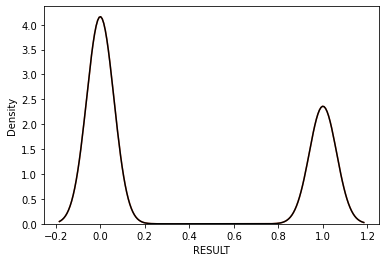

In [ ]:
ax1 = sns.distplot(y_test1, hist=False, color="coral", label="Actual Value of Pred")
sns.distplot(y_pre4, hist=False, color="black", label="Fitted Values of Pred" , ax=ax1)

In [ ]:
print("Report : ", classification_report(y_test1, y_pre4))

Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     19140
           1       1.00      1.00      1.00     10860

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(x_train1, y_train1)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:   33.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
